#Chapter7

Tran으로 학습을하고 Test로 시험을 본다. 
<br>시험을 보고 test 결과 기다리기가 귀찮아서 validation을 한다. 
<br>train과 validation을 나눈다. 
<br>validation loss가 증가 할 때 학습을 멈춘다.

(10000, 2)


Text(0.5, 1.0, 'Test Set Distribution')

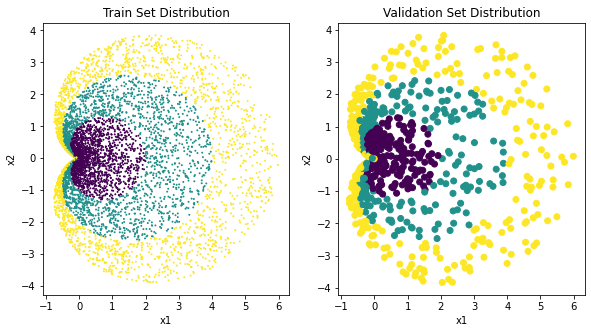

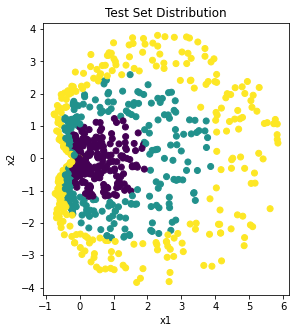

In [ ]:
#===============데이터 만들기
import numpy as np
import matplotlib.pyplot as plt
r = np. random.rand(10000) * 3 #0부터 3까지 랜덤으로 나옴
theta = np.random.rand(10000) * 2 * np.pi
y = r.astype(int) #r을 int형으로 바꾸기
r = r * (np.cos(theta) + 1)
x1 = r * np.cos(theta)
x2 = r * np.sin(theta)
X = np.array([x1, x2]).T 
print(X.shape) #10000개의 데이터 2개의 입력으로 만든다.


train_X, train_y = X[:8000, :], y[:8000]
val_X, val_y = X[8000:9000], y[8000:9000]
test_X, test_y = X[9000:, : ], y[9000:]

fig = plt.figure(figsize= (15, 5))
ax1 = fig.add_subplot(1, 3, 1)
ax1.scatter(train_X[:, 0], train_X[:, 1], c = train_y, s=0.9) #시퀀스별: For a sequence of values to be color-mapped, use the 'c' argument instead. s는 점의 크기이다. 그외) marker이용
ax1.set_xlabel('x1')
ax1.set_ylabel('x2')
ax1.set_title('Train Set Distribution')

ax2 = fig.add_subplot(1, 3, 2)
ax2.scatter(val_X[:, 0], val_X[:, 1], c = val_y, ) 
ax2.set_xlabel('x1')
ax2.set_ylabel('x2')
ax2.set_title('Validation Set Distribution')

fig = plt.figure(figsize= (15, 5))
ax3 = fig.add_subplot(1, 3, 3)
ax3.scatter(test_X[:, 0], test_X[:, 1], c = test_y) 
ax3.set_xlabel('x1')
ax3.set_ylabel('x2')
ax3.set_title('Test Set Distribution')

input이 x1, x2이며 그래프는 3차원이다. 왜? 색깔이 출력이기 때문이다.  
입력 2개로 출력이 나온다.


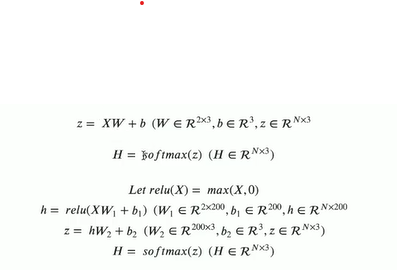

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
class LinearModel(nn.Module):
  def __init__(self):
    super(LinearModel, self).__init__()
    self.linear1 = nn.Linear(2, 3, bias = True) #(input_features = 2, outputt_features = 3, bias = True)
    self.softmax = nn.Softmax()  
  def forward(self, x):
    x = self.linear1(x)
    return x

class MLPModel(nn.Module):
  def __init__(self):
    super(MLPModel, self).__init__()
    self.linear1 = nn.Linear(2, 200)
    self.linear2 = nn.Linear(200, 3)
    self.relu = nn.ReLU()

  def forward(self, x):
    x = self.linear1(x)
    x = self.relu(x)
    x = self.linear2(x)
    return x

In [ ]:
criterion = nn.CrossEntropyLoss()

test_pred_y = torch.Tensor([[1, 0], [0, 1]])
test_true_y1 = torch.Tensor([1, 0]).long()
test_true_y2 = torch.Tensor([0, 1]).long()


print(criterion(test_pred_y, test_true_y2))

tensor(0.3133)


In [ ]:
import torch.optim as optim
from sklearn.metrics import accuracy_score
model = LinearModel()
print("{} prameters".format(sum(p.numel() for p in model.parameters() if p.requires_grad)))

#=============optimizer================
lr = 0.005
optimizer = optim.SGD(model.parameters(), lr = lr)

list_epoch = []
list_train_loss = [] 
list_val_loss = []
list_acc =[]
list_acc_epoch = []



epoch = 4000

for i in range(epoch):
#=============================학습=====
  model.train()
  optimizer.zero_grad()
  input_X = torch.Tensor(train_X)
  true_y = torch.Tensor(train_y).long()
  pred_y = model(input_X)
  loss = criterion(pred_y.squeeze(), true_y)
  loss.backward()
  optimizer.step()
  list_epoch.append(i)
  list_train_loss.append(loss.item())

#=============================검증====
  model.eval()
  optimizer.zero_grad()
  input_X = torch.Tensor(val_X)
  true_y = torch.Tensor(val_y).long()
  pred_y = model(input_X)
  loss = criterion(pred_y, true_y)
  list_val_loss.append(loss.detach().numpy())

#=============================시험====

  if i % 200 == 0:
    model.eval()
    optimizer.zero_grad()
    input_X = torch.Tensor(test_X)
    true_y = torch.tensor(true_y).long()
    predicted = model(input_X).detach().max(dim=1)[1].numpy()
    
    acc = accuracy_score(true_y, predicted) #sklearn에서는 (정답, 예측)으로 받는다. 
    list_acc.append(acc)
    list_acc_epoch.append(i)

    fig = plt.figure(figsize=(15,5))
        
    # ====== True Y Scattering ====== #
    ax1 = fig.add_subplot(1, 3, 1)
    ax1.scatter(test_X[:, 0], test_X[:, 1], c=test_y)
    ax1.set_xlabel('x1')
    ax1.set_ylabel('x2')
    ax1.set_title('True test y')
        
    # ====== Predicted Y Scattering ====== #
    ax2 = fig.add_subplot(1, 3, 2)
    ax2.scatter(test_X[:, 0], test_X[:, 1], c=predicted)
    ax2.set_xlabel('x1')
    ax2.set_ylabel('x2')
    ax2.set_title('Predicted test y')
        
    # ====== Just for Visualizaing with High Resolution ====== #
    input_x = torch.Tensor(train_X)
    predicted = model(input_x).detach().max(dim=1)[1].numpy() 
        
    ax3 = fig.add_subplot(1, 3, 3)
    ax3.scatter(train_X[:, 0], train_X[:, 1], c=predicted)
    ax3.set_xlabel('x1')
    ax3.set_ylabel('x2')
    ax3.set_title('Prediction on train set')

    plt.show()
    print('Epoch: ', i,  'Accuracy: ', acc*100, '%')

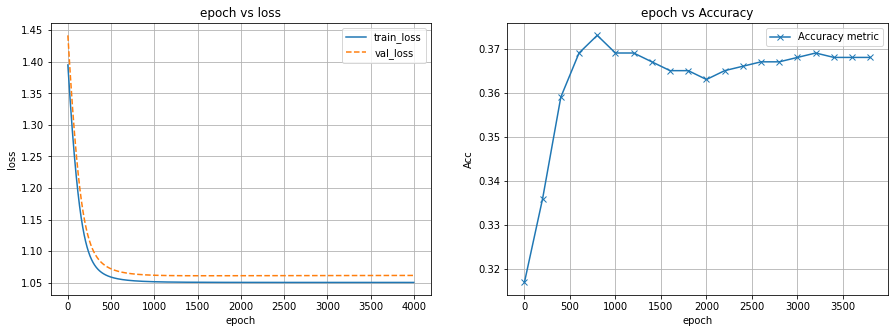

In [ ]:
fig = plt.figure(figsize=(15,5))

# ====== Loss Fluctuation ====== #
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(list_epoch, list_train_loss, label='train_loss')
ax1.plot(list_epoch, list_val_loss, '--', label='val_loss')
ax1.set_xlabel('epoch')
ax1.set_ylabel('loss')
ax1.grid()
ax1.legend()
ax1.set_title('epoch vs loss')

# ====== Metric Fluctuation ====== #
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(list_acc_epoch, list_acc, marker='x', label='Accuracy metric')
ax2.set_xlabel('epoch')
ax2.set_ylabel('Acc')
ax2.grid()
ax2.legend()
ax2.set_title('epoch vs Accuracy')

plt.show()

크로스 엔트로피를 할 때,  
라벨에 해당하는 카테고리는 무조건! .long()을 해야한다. float는 반응 안한다.  
.long()은 무조건 텐서의 형태를 정수로 설정한다.  

print('{} parameters'.format(sum(p.numel() for p in model.parameters() if p.requires_grad))) #모델의 파라미터수를 설정  
model.parameters() 괄호를 잊지말자  
loss = criterion(pred_y.squeeze(), true_y)  
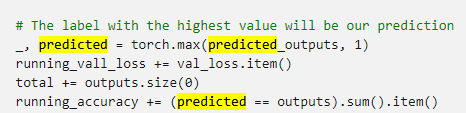   
accuracy를 정의하는 다른 방법     
.item()은 .detach().numpy()와 같다.   

In [ ]:
a = torch.Tensor([1])
f = a.item()
print(f)
print(type(f))

1.0
<class 'float'>


.item()은 1개의 숫자만 들어갈 수 있으며, 텐서형태였던 숫자를 정수나 소수의 형태로 바꿔준다.

max에 관하여

In [ ]:
import torch
a = torch.rand((3,10))
print("1:", a)
b, c = torch.max(a, dim =1)

print("2:", b)
print("3:", c)
print(type(b))
print("{:=^20}".format('다른 예제'))
for i in range(2): 
  e = a.detach().max(dim =1)[i].numpy()
  print("4:", e)
print(type(e))




1: tensor([[0.9808, 0.9741, 0.6246, 0.1686, 0.7680, 0.2515, 0.9711, 0.1403, 0.9879,
         0.1984],
        [0.1364, 0.6008, 0.4342, 0.3996, 0.6242, 0.2377, 0.5990, 0.2706, 0.7662,
         0.0482],
        [0.2666, 0.1644, 0.3430, 0.2808, 0.3336, 0.8693, 0.1750, 0.2717, 0.0507,
         0.3686]])
2: tensor([0.9879, 0.7662, 0.8693])
3: tensor([8, 8, 5])
<class 'torch.Tensor'>
=======다른 예제========
4: [0.9879036 0.7662296 0.86934  ]
4: [8 8 5]
<class 'numpy.ndarray'>


torch.max(출력물, dim = 1)을 하면 행마다 최대값을 구한다.    
dim = 1 을  해야한다. 열의 크기중에서 제일 큰 값을 반환해야 하기 때문이다.        
(출력에서 행의 크기는 배치사이즈며, 열의 크기는 출력물의 클래스의 갯수만큼 나온다.)    

torch.max를 하면 최대값과 최대값의 인덱스가 나온다.   
type은 tensor이다.  



<br>출력물.detach().max(dim = 1)[i].numpy()의 경우
i = 0일때 최대값, i = 1일때 최대값의 인덱스를 반환한다.   
type은 numpy이다.   
연산에서 떼어낸다음 최대값구하고 numpy로 바꾼다고 생각하면 된다.    
보통 최대값보단, 최대값의 인덱스를 보는 편이다. 

#Chapter8

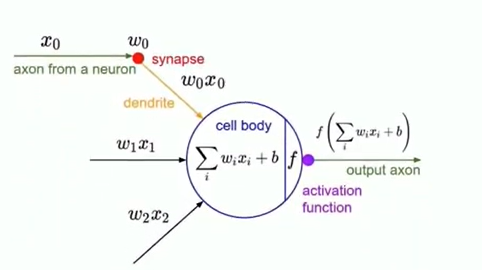

신호에 적절한 가중치를 곱하고 bias를 더하기   
뉴런에 신호값: activation function을 만든다.   
신호가 약하면 억제, 신호가 강하면 신호 통과   
activation은 non_linear이다.    



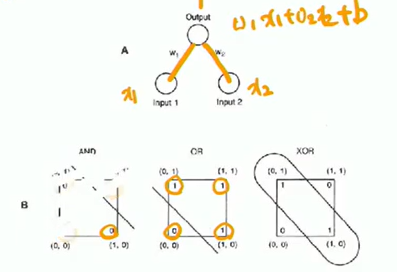
and와 or problem을 학습

0과 1을 잘 나누는 학습을 수행하였다. And Or은 잘 나누었으나 XOR문제는 해결을 못한다.    

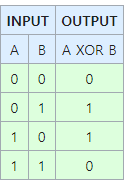

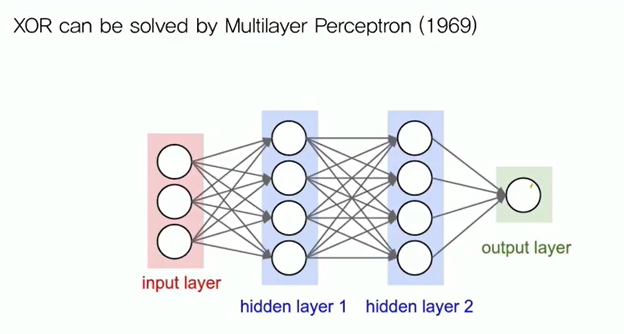

MLP의 구조를 제안

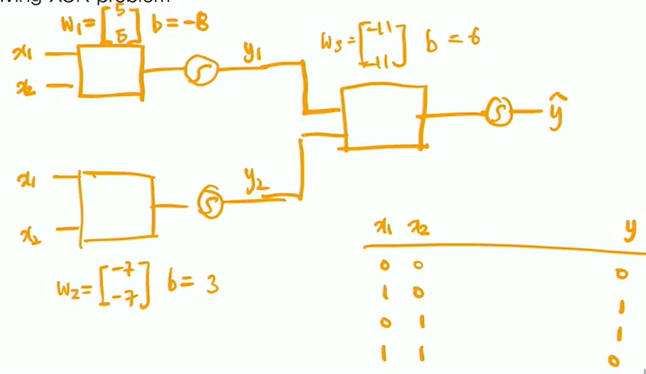

학습을 할 방법이 없어서 연구가 중단이 된다.   
1986년 backpropagation이란 알고리즘이 탄생

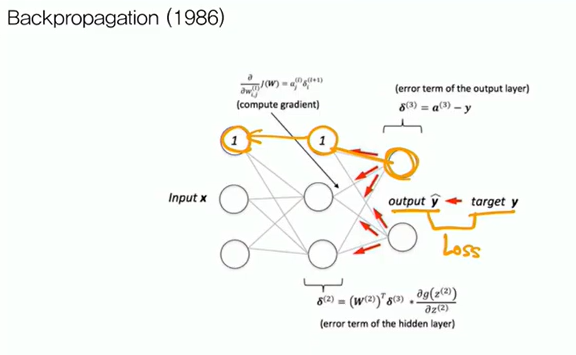

Backpropagation Algorithm

Universal Approximation 이론   
층이 깊어지면 어떤 문제든 맞출 수 있다.  
층이 깊어지면 어떻게 편미분이 가능한가?   

Chain Rule을 이용    


f = g + b    
computational graph로 표현이 가능하다.    
f = g + b    
g = wx    
1.Feed Forward    
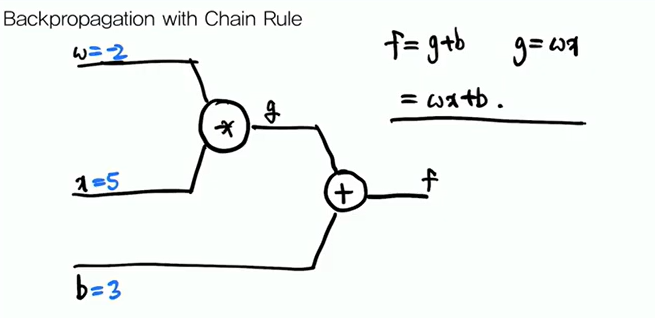


Output이 어떻게 나오는지 계산을 해보기   
wx + b -> -2*5+3 = -7   

$$ \frac{df}{dw} =  \frac{df}{dg} \cdot \frac{dg}{dw}   $$

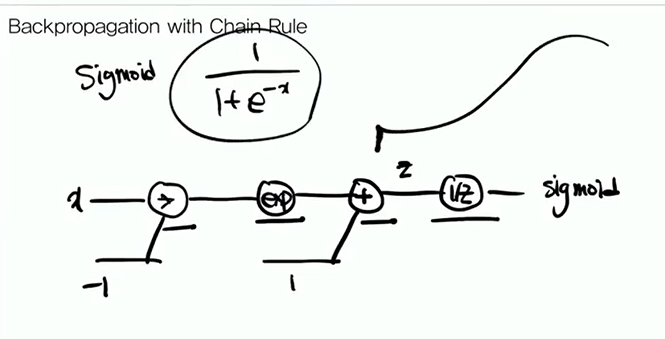

시그모이드도 적용가능: 아무리 복잡해도 미분이 가능   
다행히도 파이토치가 미분을 해준다.

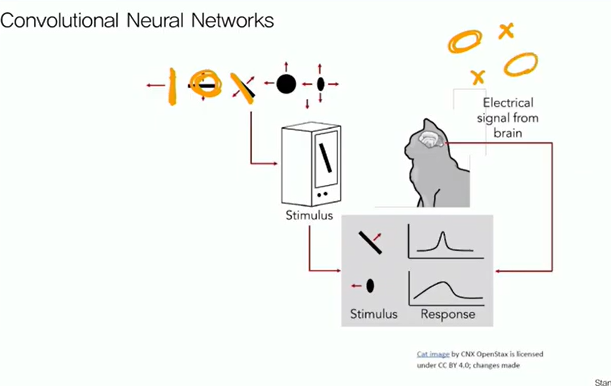

이미지의 edge에 따라고양이의 뇌의 신호가 바뀌는 것을 관찰

CNN이 탄생

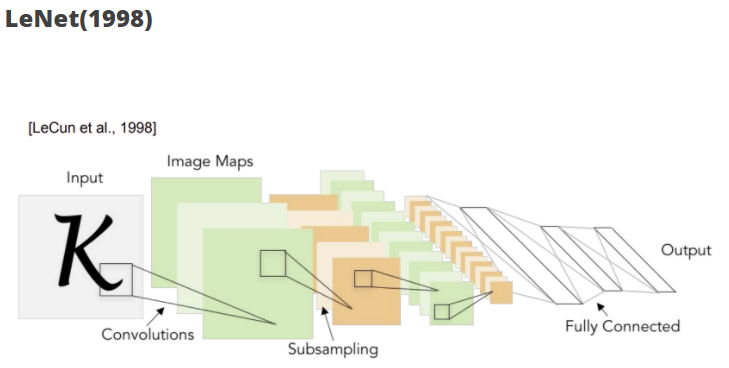

1998년에 처음 탄생되었으며, 한동안 쓰이지 않다가 2012년부터 발달하게 되었다.

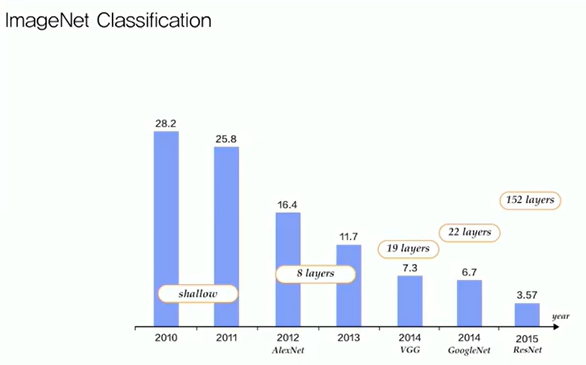

CNN을 이용하여 오차를 줄이다가 2015년 사람보다 이미지의 구분을 더 잘하게 되었다.